## 83. 如何在Pandas中分别对一列数据的正数和负数进行分组聚合操作

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'values':[1,-2,3,-4,5]})
df

,values
0,1
1,-2
2,3
3,-4
4,5


In [2]:
df['positive'] = df['values'] > 0
df['negative'] = df['values'] <= 0
df

,values,positive,negative
0,1,True,False
1,-2,False,True
2,3,True,False
3,-4,False,True
4,5,True,False


In [3]:
result = df.groupby(['positive','negative']).agg({'values':'sum'})
result

,,values
positive,negative,
False,True,-6
True,False,9


## 84. 如何在Pandas中实现字符串的叠加操作？

In [4]:
df = pd.DataFrame({'A':['hello','world'],'B':['pandas','numpy']})
df

,A,B
0,hello,pandas
1,world,numpy


In [5]:
df['C'] = df['A'] + df['B']
df

,A,B,C
0,hello,pandas,hellopandas
1,world,numpy,worldnumpy


## 85. 如何对数据框中的字符串进行模糊匹配?

In [6]:
data = pd.DataFrame({'name':['Alice','Bob','Cathy','Daniel','Emily'],'score':[85,73,90,82,79]})
data

,name,score
0,Alice,85
1,Bob,73
2,Cathy,90
3,Daniel,82
4,Emily,79


In [7]:
matched_rows = data['name'].str.contains('a')
result = data[matched_rows]
result

,name,score
2,Cathy,90
3,Daniel,82


In [8]:
matched_rows = data['name'].str.contains('a|e')
result = data[matched_rows]
result

,name,score
0,Alice,85
2,Cathy,90
3,Daniel,82


## 86. 如何使用Pandas处理自然语言和文本数据？

- `lower()/upper()`: 将字符串转换为小写/大写。
- `strip()`: 去除字符串首尾空格。
- `split()`: 将字符串按照指定的分隔符进行分割。
- `contains()`: 判断字符串中是否包含指定的文本。
- `replace()`: 将字符串中指定的文本替换为新的文本。
- `extract()`: 从字符串中提取指定的文本。

In [9]:
data = {
    '英文名称' : ['pku','thu','sju','bfsu','ouc','xju']
}
df = pd.DataFrame(data)
df

,英文名称
0,pku
1,thu
2,sju
3,bfsu
4,ouc
5,xju


In [10]:
result = df['英文名称'].str.lower()
result

0     pku
1     thu
2     sju
3    bfsu
4     ouc
5     xju
Name: 英文名称, dtype: object

In [13]:
result = df['英文名称'].str.upper()
result

0     PKU
1     THU
2     SJU
3    BFSU
4     OUC
5     XJU
Name: 英文名称, dtype: object

## 87.如何在数据框中找到重复的行

In [24]:
df = pd.DataFrame({
    'id' : [1,2,3,3,2],
    'name' : ['Tom','Jerry','Jack','Lucy','Jerry']
})

In [25]:
df

,id,name
0,1,Tom
1,2,Jerry
2,3,Jack
3,3,Lucy
4,2,Jerry


In [26]:
drup_rows = df.duplicated()
drup_rows

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [27]:
dup_rows = df.duplicated(subset=['id'])
dup_rows

0    False
1    False
2    False
3     True
4     True
dtype: bool

## 88. 如何查看数据的异常值?

In [28]:
import matplotlib.pyplot as plt

In [ ]:
# describe()
# boxplot()
# isin()
# clip()
# drop()

## 89.如何查看数据的缺失值

In [31]:
data = {
    'A':[1,2,3,np.nan,5],
    'B':['t','c','g','f','e']
}
df = pd.DataFrame(data)
df

,A,B
0,1.0,t
1,2.0,c
2,3.0,g
3,NaN,f
4,5.0,e


In [32]:
df.isnull().sum()

A    1
B    0
dtype: int64

## 90.如何在Pandas获取某一列的值只有一次出现的所有行

In [39]:
df = pd.read_csv('../../../miniconda3/envs/tf/lib/python3.9/site-packages/pingouin/datasets/rm_missing.csv')

In [40]:
df

,Study,Subj,Gender,Session,Time,Memory,BOLD,Mood,File
0,Pilot,1,M,Pre,Evening,4.0,2.0,NaN,S1_pre_evening.csv
1,Pilot,1,M,Pre,Morning,7.0,NaN,NaN,S1_pre_morning.csv
2,Pilot,1,M,Post,Evening,4.0,7.0,NaN,S1_post_evening.csv
3,Pilot,1,M,Post,Morning,5.0,NaN,NaN,S1_post_morning.csv
4,Pilot,2,M,Pre,Evening,5.0,6.0,3.0,S2_pre_evening.csv
5,Pilot,2,M,Pre,Morning,1.0,9.0,9.0,S2_pre_morning.csv
6,Pilot,2,M,Post,Evening,5.0,10.0,8.0,S2_post_evening.csv
7,Pilot,2,M,Post,Morning,6.0,5.0,3.0,S2_post_morning.csv
8,Pilot,3,F,Pre,Evening,NaN,10.0,6.0,S3_pre_evening.csv
9,Pilot,3,F,Pre,Morning,2.0,6.0,5.0,S3_pre_morning.csv


In [42]:
value_count = df['Memory'].value_counts()
value_count

Memory
5.0    6
4.0    4
7.0    4
6.0    3
8.0    3
1.0    2
2.0    2
9.0    2
3.0    1
Name: count, dtype: int64

In [47]:
result = df[df['Memory'].isin(list(value_count[value_count == 1].index))]

In [48]:
result

,Study,Subj,Gender,Session,Time,Memory,BOLD,Mood,File
19,Pilot,5,F,Post,Morning,3.0,6.0,7.0,S5_post_morning.csv


## 91.如何在Pandas中实现微积分

In [50]:
df = pd.DataFrame({'time':[1,2,3,4,5],
                   'value':[10,20,30,40,50]
})
df

,time,value
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [51]:
df['diff1'] = df['value'].diff()
df['diff2'] = df['diff1'].diff()
df

,time,value,diff1,diff2
0,1,10,NaN,NaN
1,2,20,10.0,NaN
2,3,30,10.0,0.0
3,4,40,10.0,0.0
4,5,50,10.0,0.0


## 92.如何将DataFrame中的某一列中包含的字符串进行拆分？

In [52]:
df = pd.read_csv('../../../miniconda3/envs/tf/lib/python3.9/site-packages/pingouin/datasets/rm_missing.csv')
df

,Study,Subj,Gender,Session,Time,Memory,BOLD,Mood,File
0,Pilot,1,M,Pre,Evening,4.0,2.0,NaN,S1_pre_evening.csv
1,Pilot,1,M,Pre,Morning,7.0,NaN,NaN,S1_pre_morning.csv
2,Pilot,1,M,Post,Evening,4.0,7.0,NaN,S1_post_evening.csv
3,Pilot,1,M,Post,Morning,5.0,NaN,NaN,S1_post_morning.csv
4,Pilot,2,M,Pre,Evening,5.0,6.0,3.0,S2_pre_evening.csv
5,Pilot,2,M,Pre,Morning,1.0,9.0,9.0,S2_pre_morning.csv
6,Pilot,2,M,Post,Evening,5.0,10.0,8.0,S2_post_evening.csv
7,Pilot,2,M,Post,Morning,6.0,5.0,3.0,S2_post_morning.csv
8,Pilot,3,F,Pre,Evening,NaN,10.0,6.0,S3_pre_evening.csv
9,Pilot,3,F,Pre,Morning,2.0,6.0,5.0,S3_pre_morning.csv


In [59]:
# df['File'] = df['File'].str.split('')
df = pd.read_table("../../documents/sll/ssl.log",header=None)
df

,0
0,"['1603708023', 'Info', 'NodeManager', '0', 'Wo..."
1,"['1603708023', 'Info', 'NodeManager', '0', 'Se..."
2,"['1603708023', 'Notice', 'WebLogicServer', 'BE..."
3,"['1603708024', 'Info', 'WebLogicServer', 'BEA-..."
4,"['1603708052', 'Info', 'Management', 'BEA-1411..."
...,...
1901,"['1606991965', 'Notice', 'WebLogicServer', 'BE..."
1902,"['1606991965', 'Notice', 'WebLogicServer', 'BE..."
1903,"['1606991965', 'Notice', 'Server', 'BEA-002607..."
1904,"['1606991965', 'Notice', 'Server', 'BEA-002607..."


In [72]:
df['test'] = df[0].str.split(',')
df['test']

0       [['1603708023',  'Info',  'NodeManager',  '0',...
1       [['1603708023',  'Info',  'NodeManager',  '0',...
2       [['1603708023',  'Notice',  'WebLogicServer', ...
3       [['1603708024',  'Info',  'WebLogicServer',  '...
4       [['1603708052',  'Info',  'Management',  'BEA-...
                              ...                        
1901    [['1606991965',  'Notice',  'WebLogicServer', ...
1902    [['1606991965',  'Notice',  'WebLogicServer', ...
1903    [['1606991965',  'Notice',  'Server',  'BEA-00...
1904    [['1606991965',  'Notice',  'Server',  'BEA-00...
1905    [['1606991968',  'Info',  'NodeManager',  '0',...
Name: test, Length: 1906, dtype: object

## 93.如何使用Pandas进行哈希算法和密码学？

In [74]:
import hashlib
hash_onject = hashlib.md5(b'hello world')
hash_onject.hexdigest()

'5eb63bbbe01eeed093cb22bb8f5acdc3'

In [75]:
hash_object = hashlib.sha256(b'hello world')
hash_object.hexdigest()

'b94d27b9934d3e08a52e52d7da7dabfac484efe37a5380ee9088f7ace2efcde9'

In [76]:
from cryptography.fernet import Fernet

# 生成密钥
key = Fernet.generate_key()
key

b'4IE5bbqePdTaWxJpNDFC_L4nKayFnCIsrxnHoWVYrfY='

In [77]:
cipher_suite = Fernet(key)
cipher_text = cipher_suite.encrypt(b'hello world')
cipher_text

b'gAAAAABk_adJwNSLV4ams9B10OE4dOV6tMLM_jaK3Rf2yeIR6WbdfNHLeBU6xN3AvXujOSeUuoL-3K1rb07-kBxgXwLdzyxsTQ=='

In [78]:
plain_text = cipher_suite.decrypt(cipher_text)
plain_text

b'hello world'

## 94. 如何在Pandas中使用groupby和agg函数进行分组聚合操作

In [79]:
df = pd.DataFrame({
    'Name':['Tom','Jerry','Tom','Jerry','Tom','Jerry'],
    'Gender':['M','M','M','M','M','M'],
    'Score':[80,90,75,85,70,95]
})
df

,Name,Gender,Score
0,Tom,M,80
1,Jerry,M,90
2,Tom,M,75
3,Jerry,M,85
4,Tom,M,70
5,Jerry,M,95


In [80]:
result = df.groupby('Name').agg({'Score':['mean','max','min']})
result

Score        
       mean max min
Name               
Jerry  90.0  95  85
Tom    75.0  80  70

## 95. 如何在DataFrame中使用 `cumsum` 函数进行累加计算

In [83]:
data = {
    'A':[1,2,3,4,5],
    'B':[10,20,30,40,50],
    'C':[100,200,300,400,500]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [82]:
cumulative_sum = df.cumsum(axis=1)
cumulative_sum

,A,B,C
0,1,11,111
1,2,22,222
2,3,33,333
3,4,44,444
4,5,55,555


## 96. 如何将DataFrame根据某列的值进行过滤

In [86]:
df = pd.DataFrame({
    'Name':['Tom','Jerry','Tom','Jerry','Tom','Jerry'],
    'Gender':['F','M','M','M','M','F'],
    'Score':[80,90,75,85,70,95]
})
df

,Name,Gender,Score
0,Tom,F,80
1,Jerry,M,90
2,Tom,M,75
3,Jerry,M,85
4,Tom,M,70
5,Jerry,F,95


In [87]:
df_filted = df.loc[df['Gender']=='M']
df_filted

,Name,Gender,Score
1,Jerry,M,90
2,Tom,M,75
3,Jerry,M,85
4,Tom,M,70


## 97. 如何使用Pandas DataFrame中的值计算新列

In [89]:
df = pd.DataFrame({
    'name':['Alice','Bob','Charlie','David','Emily'],
    'score':[80,90,85,95,92]
})
df

,name,score
0,Alice,80
1,Bob,90
2,Charlie,85
3,David,95
4,Emily,92


In [90]:
df['weighted_score'] = 0.4* df['score']+0.6*100
df

,name,score,weighted_score
0,Alice,80,92.0
1,Bob,90,96.0
2,Charlie,85,94.0
3,David,95,98.0
4,Emily,92,96.8


## 98. 如何在Pandas中为一个DataFrame的每个元素应用一个自定义函数

In [91]:
def double(x):
    return x*2

In [92]:
df = pd.DataFrame({
    'A':[1,2,3],
    'B':[4,5,6],
    'C':[7,8,9]
})

In [93]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [96]:
df = df.apply(double)
df

,A,B,C
0,2,8,14
1,4,10,16
2,6,12,18


## 99.如何使用Pandas实现大数据的处理和分析

In [97]:
df = pd.DataFrame(np.random.randint(10,100,100))
df

,0
0,61
1,60
2,47
3,70
4,59
...,...
95,58
96,11
97,25
98,49


In [99]:
df[0].mean()

55.25

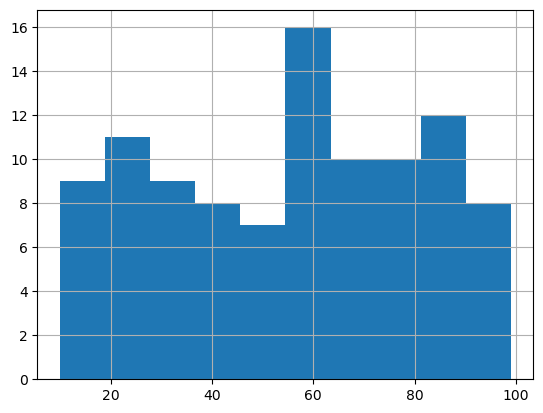

In [100]:
import matplotlib.pyplot as plt
df[0].hist()
plt.show()

## 100.如何从一个CSV文件中读取数据，将其中的数值数据进行聚合，并计算每个聚合后的组的中位数

In [102]:
df = pd.DataFrame({
    'Name':['Tom','Jerry','Tom','Jerry','Tom','Jerry'],
    'Gender':['F','M','M','M','M','F'],
    'Score':[80,90,75,85,70,95]
})
df

,Name,Gender,Score
0,Tom,F,80
1,Jerry,M,90
2,Tom,M,75
3,Jerry,M,85
4,Tom,M,70
5,Jerry,F,95


In [105]:
result = df.groupby('Gender').agg({'Score':['mean','median']})
result

Score       
        mean median
Gender             
F       87.5   87.5
M       80.0   80.0